<a href="https://colab.research.google.com/github/jshmauve/Stern-Gerlach/blob/main/Stern_Gerlach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#필요한 라이브러리 불러오기

In [2]:
import os

In [ ]:
os._exit(00)

In [2]:
pip install qiskit

     |████████████████████████████████| 6.1 MB 5.4 MB/s 
     |████████████████████████████████| 18.0 MB 127 kB/s 
     |████████████████████████████████| 235 kB 64.5 MB/s 
     |████████████████████████████████| 207 kB 54.9 MB/s 
     |████████████████████████████████| 2.1 MB 48.7 MB/s 
     |████████████████████████████████| 200 kB 73.7 MB/s 
     |████████████████████████████████| 1.4 MB 53.9 MB/s 
     |████████████████████████████████| 635 kB 39.0 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
     |████████████████████████████████| 943 kB 49.4 MB/s 
     |████████████████████████████████| 38.2 MB 19 kB/s 
     |████████████████████████████████| 3.0 MB 43.3 MB/s 
     |████████████████████████████████| 6.3 MB 15.5 MB/s 
  Created wheel for qiskit: filename=qiskit-0.29.1-py3-none-any.whl size=11239 sha256=65ee4684643ffc4a7cf3b259ce0f2c1c90598bf95bccf51277eb945915e38921
  Stored in directory: /root/.cache/pip/whe

In [3]:
pip install ibm_quantum_widgets

     |████████████████████████████████| 993 kB 5.4 MB/s 


In [4]:
pip install pylatexenc

     |████████████████████████████████| 162 kB 5.3 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136833 sha256=3f578a81e1d468a5e384e5a73c5584aa9508ec67dc3c7e2350c5cea234e871e6
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc


In [24]:
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
IBMQ.save_account('') # '' 안에 자신의 API token 복붙하기
provider = IBMQ.load_account()

IBMQAccountCredentialsInvalidToken: ignored

# z방향 실험

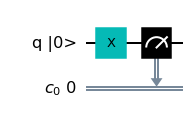

In [7]:
qc = QuantumCircuit(1,1)
 
qc.x(0)  # |1> 상태
qc.measure(0,0)
 
qc.draw(output='mpl',initial_state=True,cregbundle=False)

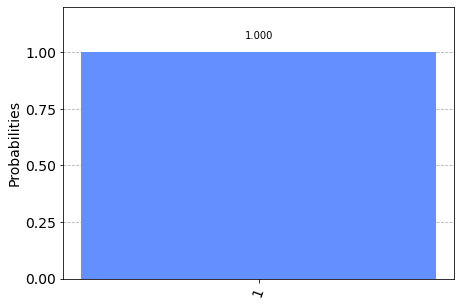

In [8]:
qasm_sim = Aer.get_backend('qasm_simulator')
counts = execute(qc,qasm_sim).result().get_counts()
plot_histogram(counts)

In [9]:
# 실제 양자컴퓨터에서 실행
backend = provider.get_backend('ibmq_manila')
job = execute(qc, backend)

In [10]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


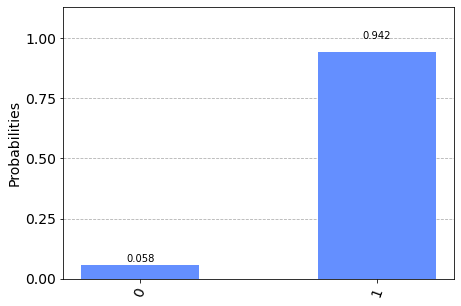

In [11]:
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

# x방향 실험

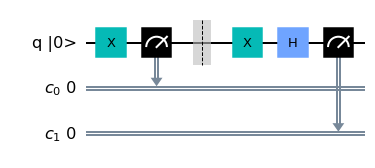

In [12]:
qc = QuantumCircuit(1,2)

qc.x(0)  # |1> 상태
qc.measure(0,0)
qc.barrier()

# 축 회전
qc.x(0)
qc.h(0)
qc.measure(0,1)

qc.draw(output='mpl',initial_state=True,cregbundle=False)

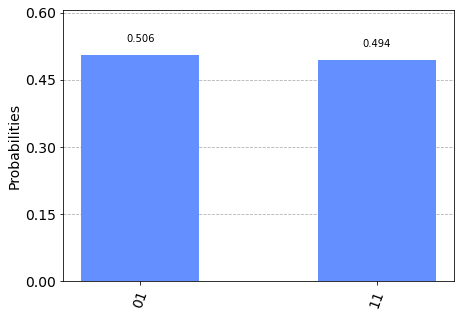

In [13]:
counts = execute(qc,qasm_sim).result().get_counts()
plot_histogram(counts)

In [14]:
job = execute(qc, backend)

In [15]:
job_monitor(job)

Job Status: job has successfully run


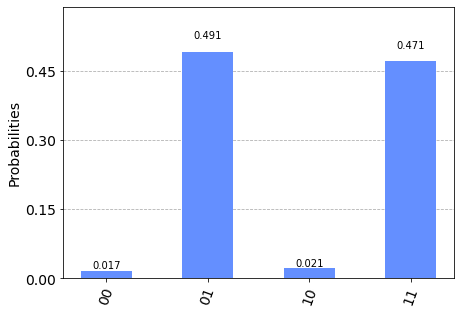

In [16]:
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

# x - z방향 실험

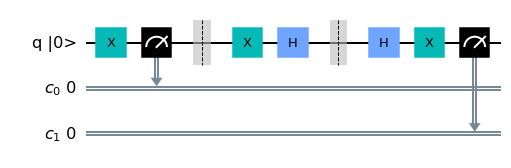

In [17]:
qc = QuantumCircuit(1,2)

qc.x(0)  # |1> 상태
qc.measure(0,0) # z축 측정
qc.barrier()

# 축 회전
qc.x(0)
qc.h(0)
qc.barrier()

# 축을 다시 돌려놓음
qc.h(0)
qc.x(0)
qc.measure(0,1) # z축 측정
 
qc.draw(output='mpl',initial_state=True,cregbundle=False)

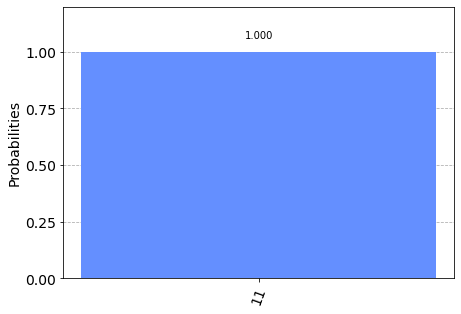

In [18]:
counts = execute(qc,qasm_sim).result().get_counts()
plot_histogram(counts)

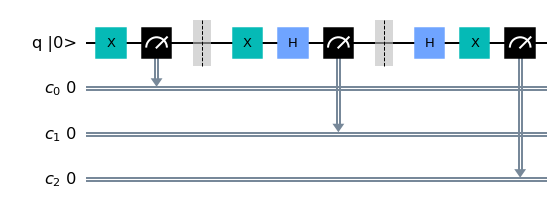

In [19]:
qc = QuantumCircuit(1,3)
 
qc.x(0)  # |1> 상태
qc.measure(0,0) # z축 측정
qc.barrier()

# 축 회전
qc.x(0)
qc.h(0)
qc.measure(0,1) # x축 측정
qc.barrier()

# 축을 다시 돌려놓음
qc.h(0)
qc.x(0)
qc.measure(0,2) # z축 측정
 
qc.draw(output='mpl',initial_state=True,cregbundle=False)

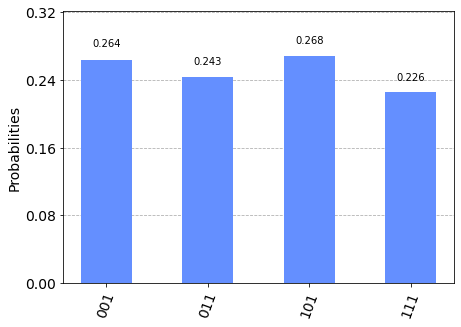

In [20]:
counts = execute(qc,qasm_sim).result().get_counts()
plot_histogram(counts)

In [21]:
job = execute(qc, backend)

In [22]:
job_monitor(job)

Job Status: job has successfully run


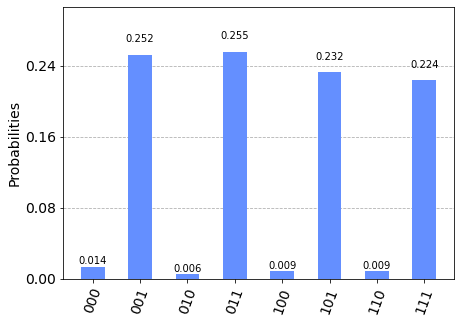

In [23]:
result = job.result()
counts = result.get_counts()
plot_histogram(counts)